# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')

In [7]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

In [8]:
df.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  int64  
 1   holiday      10886 non-null  int64  
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  int64  
 4   temp         10886 non-null  float64
 5   atemp        10886 non-null  float64
 6   humidity     10886 non-null  int64  
 7   windspeed    10886 non-null  float64
 8   casual       10886 non-null  int64  
 9   registered   10886 non-null  int64  
 10  count        10886 non-null  int64  
 11  date         10886 non-null  object 
 12  day          10886 non-null  int32  
 13  week         10886 non-null  UInt32 
 14  weekday_num  10886 non-null  int32  
 15  weekday      10886 non-null  object 
 16  year         10886 non-null  int32  
 17  month        10886 non-null  int32  
 18  hour       

In [23]:
df.groupby(['year','month']).size().sort_index(level=['year','month'], ascending=[False, True])

year  month
2012  1        453
      2        455
      3        455
      4        454
      5        456
      6        456
      7        456
      8        456
      9        456
      10       456
      11       455
      12       456
2011  1        431
      2        446
      3        446
      4        455
      5        456
      6        456
      7        456
      8        456
      9        453
      10       455
      11       456
      12       456
dtype: int64

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [41]:
daily_rentals = df.groupby('date')['count'].sum()
daily_rentals

date
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-15    5047
2012-12-16    3786
2012-12-17    4585
2012-12-18    5557
2012-12-19    5267
Name: count, Length: 456, dtype: int64

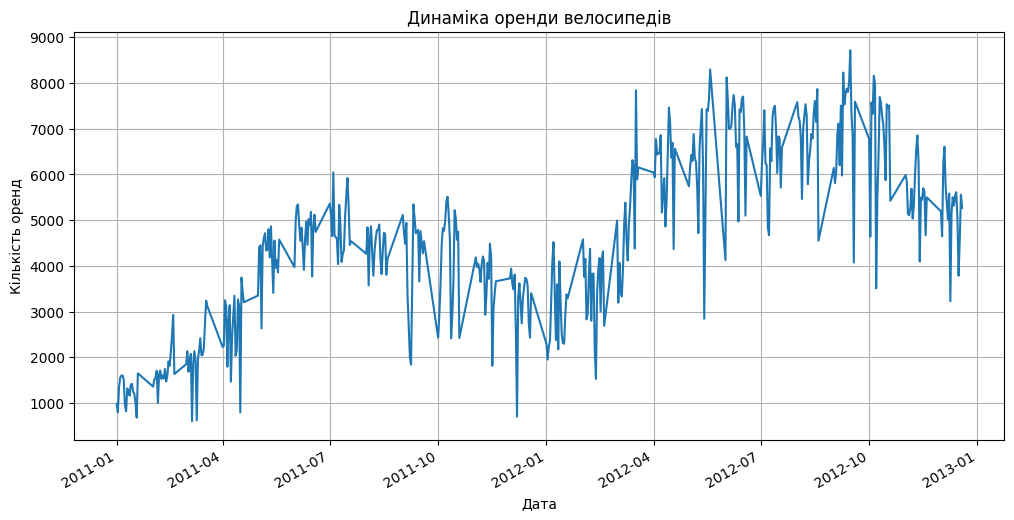

In [42]:
daily_rentals.plot.line(figsize=(12, 6))
plt.title("Динаміка оренди велосипедів")
plt.grid(True)
plt.xlabel("Дата")
plt.ylabel("Кількість оренд")
plt.show()

Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи? - Оскільки графік поденний, потрібно його згладити(укрупнити дані, наприклад помісячно).
Які загальні тенденції ви бачите на графіку? - В цілому кількість оренд зросла у 2012 році порівняно з 2011 роком. Є сезонність (наступне питання), але також осінні місяці порівняно з літніми у 2012 році виглядають більш активними, ніж у 2011 році. Можливо осінь 2012 року була теплою і сприятливою для оренди велосипедів.
Чи помітні якісь сезонні коливання? - Так, активність підвищується у теплу пору року і знижується взимку.
Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії? - Так, є аномально низькі значення в високий сезон, та відносно високі в низький сезон. В першу чергу, це могло бути через погоду (дощ, сніг чи навпаки потепління), також свята (якщо клієнти добираються на велосипеді на роботу) тощо.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

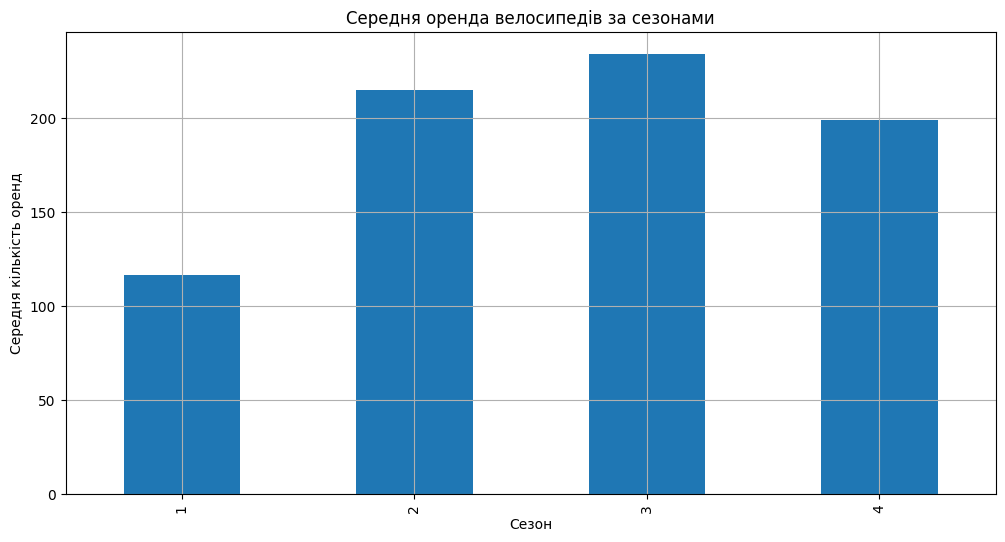

In [44]:
season_avg = df.groupby('season')['count'].mean()
season_avg.plot.bar(figsize=(12,6))
plt.title("Середня оренда велосипедів за сезонами")
plt.xlabel("Сезон")
plt.ylabel("Середня кількість оренд")
plt.grid(True)
plt.show()

In [51]:
season_avg.max() / season_avg.min()

np.float64(2.0148749597441986)

В який сезон найбільша середня кількість оренди велосипедів? - Осінь на першому місці, далі Літо та Зима, найнижчий показник Весна.
Як ви можете пояснити таку сезонну закономірність? - Мабуть тим що це Індія, і там погода відрізняється від нашої.
У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном? - Вдвічі.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


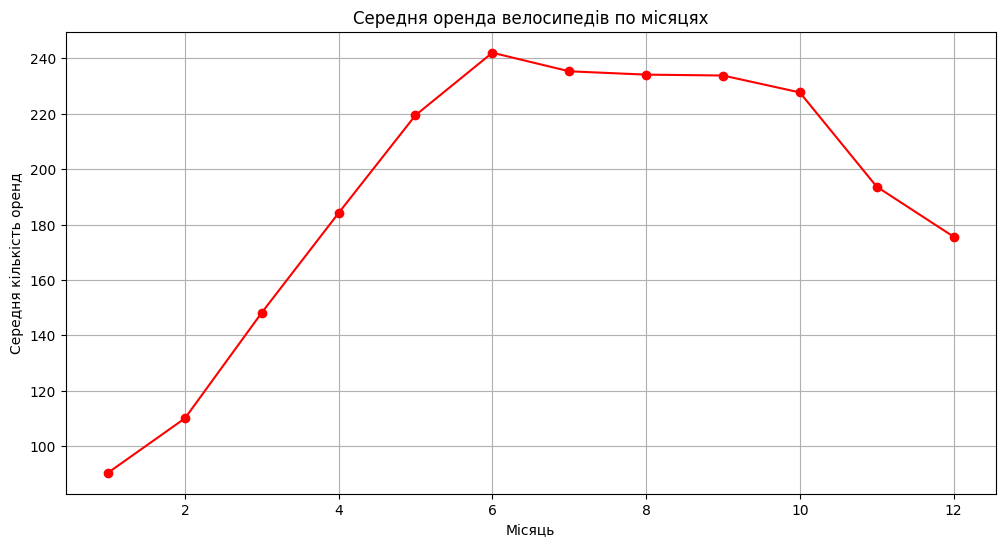

In [56]:
monthly_avg = df.groupby('month')['count'].mean()

monthly_avg.plot.line(marker='o', figsize=(12,6), color='red')

plt.title("Середня оренда велосипедів по місяцях")
plt.xlabel("Місяць")
plt.ylabel("Середня кількість оренд")
plt.grid(True)
plt.show()


В які місяці спостерігається пік та спад оренди? - Найнижча к-сть оренд в січні, в наступних місяцях к-сть зростає аж до піку в червні, 
далі відносно стабільна до жовтня і починається спадання
Чи збігається ця закономірність з результатами з попереднього завдання? - Може бути різниця в сприйнятті, найбільша оренда в червні, 
а він відноситься до сезону Літо, який на другому місці по оренді.
Як може вплинути клімат на оренду велосипедів протягом року? - зручніше користуватися велосипедом коли сухо та тепло, 
тому в такі сезони к-сть оренди буд зростати, відповідно в холодні та вологі місяці - падати. 
з іншого боку, якщо наші клієнти добираються на роботу на велосипеді, то в сезон відпусток може бути
перекос, але скоріше за все частково чи повністю перекриється за рахунок відпочиваючих які захочуть покататися.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

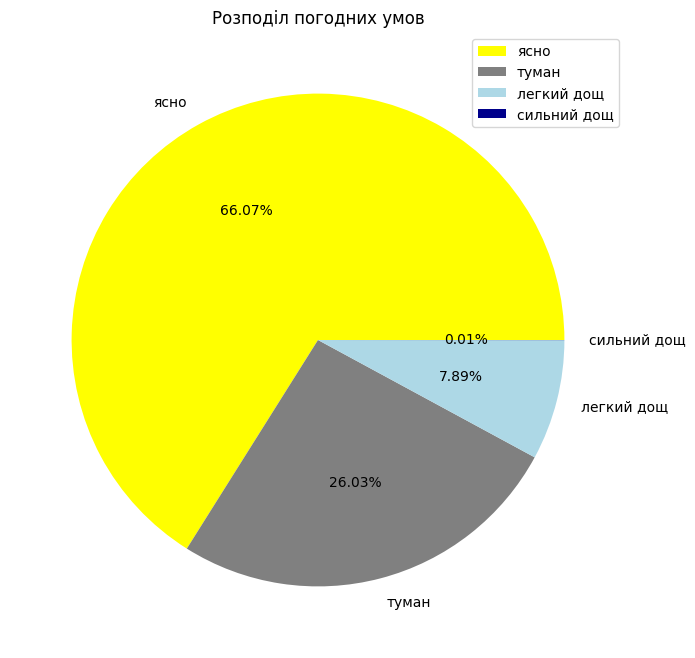

In [79]:
weather_counts = df['weather'].value_counts()

labels = ['ясно', 'туман', 'легкий дощ', 'сильний дощ']
colors = ['yellow', 'gray', 'lightblue', 'darkblue']

weather_counts.plot.pie(
    autopct='%1.2f%%',
    figsize=(8,8),
    colors=colors,
    labels=labels
)

plt.title("Розподіл погодних умов")
plt.ylabel("")
plt.legend(labels)
plt.show()


Яка погода переважає в датасеті? - Ясно.
Чи є дні із сильним дощем? Яка їх частка? - Є, 0.01% від записів.
Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів? - Найбільший попит буде коли ясно і сухо, трішки менший коли туманно але сухо, 
під дощем буде попит значно менший, під сильним дощем близький до 0.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

<Figure size 1000x600 with 0 Axes>

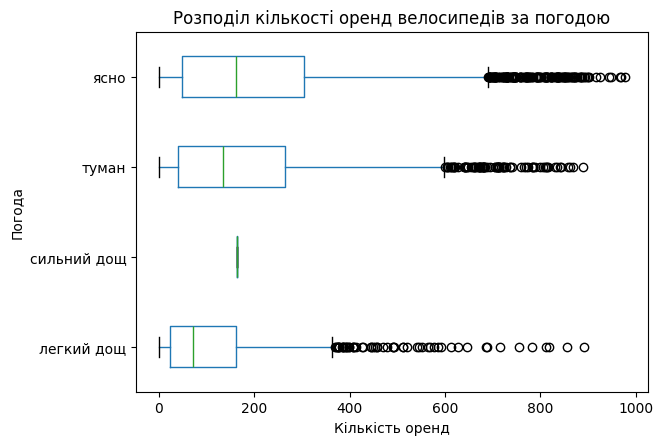

In [69]:
weather_labels = {1:'ясно', 2:'туман', 3:'легкий дощ', 4:'сильний дощ'}
df['weather_name'] = df['weather'].map(weather_labels)

plt.figure(figsize=(10,6))
df.boxplot(column='count', by='weather_name', vert=False, grid=False)
plt.title('Розподіл кількості оренд велосипедів за погодою')
plt.suptitle('')
plt.xlabel('Кількість оренд')
plt.ylabel('Погода')
plt.show()

При якій погоді найбільший розкид у кількості оренди? - При Ясно.
Чи є викиди (outliers) в даних? При якій погоді? - Є викиди, присутні по всім видам погоди, де є суттєві продажі.
При якій погоді медіанне значення оренди найвище? - Сильний дощ.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

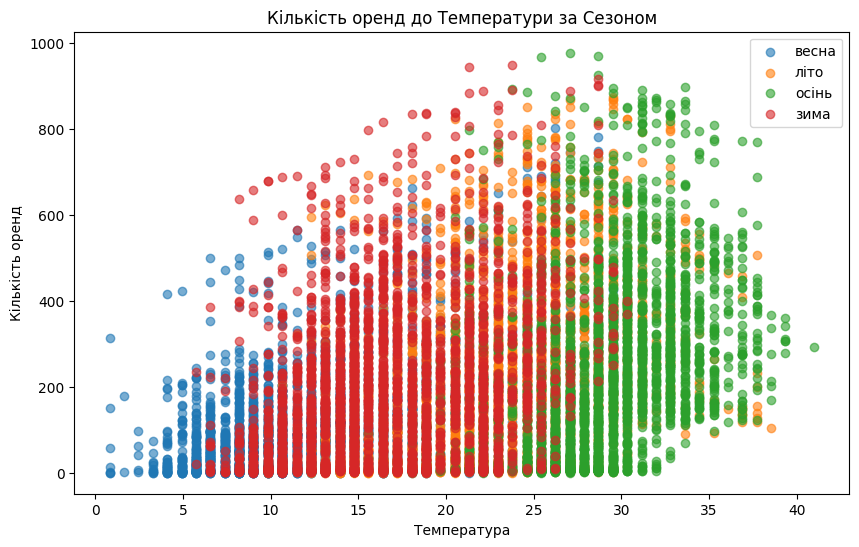

In [72]:
season_labels = {1:'весна', 2:'літо', 3:'осінь', 4:'зима'}
df['season_name'] = df['season'].map(season_labels)

plt.figure(figsize=(10,6))
for season in df['season_name'].unique():
    subset = df[df['season_name'] == season]
    plt.scatter(subset['temp'], subset['count'], alpha=0.6, label=season)

plt.xlabel('Температура')
plt.ylabel('Кількість оренд')
plt.title('Кількість оренд до Температури за Сезоном')
plt.legend()
plt.show()


Чи є зв'язок між температурою та кількістю оренди? Який? - В основному, чим тепліше, тим більше оренд, до певної точки. 
Коли стає дуже жарко (після 30), к-сть оренд зменшується. При цьому є кейси де оренд багато чи мало нежалежно від температури.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

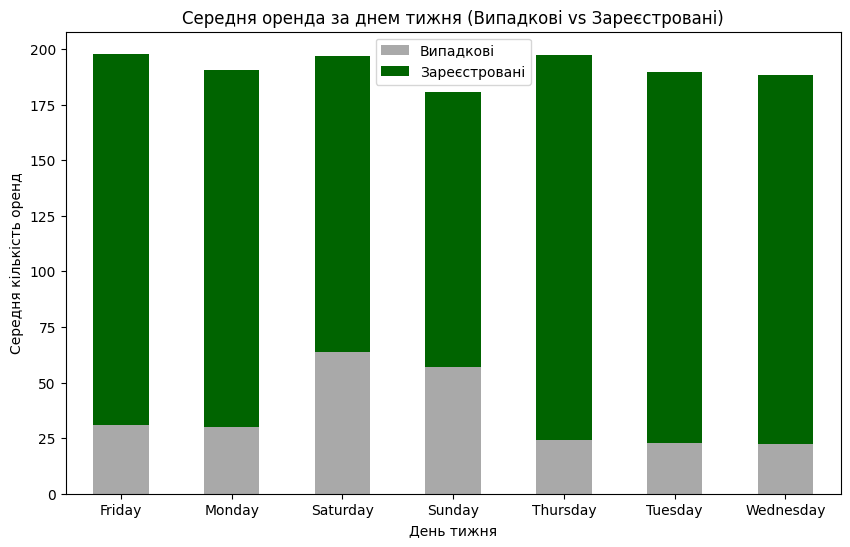

In [75]:
avg_rentals = df.groupby('weekday')[['casual', 'registered']].mean()

avg_rentals.plot.bar(stacked=True, color=['darkgrey', 'darkgreen'], figsize=(10,6))

plt.xlabel('День тижня')
plt.ylabel('Середня кількість оренд')
plt.title('Середня оренда за днем тижня (Випадкові vs Зареєстровані)')
plt.xticks(rotation=0)
plt.legend(['Випадкові', 'Зареєстровані'])
plt.show()

В які дні тижня більше оренд від зареєстрованих користувачів? - В будні дні.
Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня? - На вихідних більше незареєстрованих користувачів 
катаються на велосипеді, для відпочинку, або їдуть по незвичним для буднів справам.